In [102]:
import pandas as pd
import numpy as np
import re


import pycld2 as cld2

#!pip install -U deep-translator
from deep_translator import GoogleTranslator

In [103]:
train_raw = pd.read_excel('../Data/train.xlsx', index_col='index')
train_reviews_raw = pd.read_excel('../Data/train_reviews.xlsx', index_col='index')

KeyboardInterrupt: 

In [ ]:
train_reviews = train_reviews_raw.copy()

train_reviews['comments_clean'] = pd.Series(train_reviews['comments'], dtype='string')
train_reviews['comments_clean'] = [i.lower() for i in train_reviews['comments']]
train_reviews['comments_clean'] = [re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i) for i in train_reviews['comments']]

In [106]:
def add_lenguage_detection(df):
    #!pip install -U pycld2
    #import pycld2 as cld2

    def language_detection_cld2_v1(x):
        
        isReliable, textBytesFound, details = cld2.detect(x)
        return details[0][0]

    def language_detection_cld2_v2(x):
        
        isReliable, textBytesFound, details = cld2.detect(x)
        return isReliable

    def language_detection_cld2_v3(x):
        
        isReliable, textBytesFound, details = cld2.detect(x)
        return details

    df['language'] = df['comments_clean'].apply(language_detection_cld2_v1)
    df['language_reliable'] = df['comments_clean'].apply(language_detection_cld2_v2)
    df['language_raw'] = df['comments_clean'].apply(language_detection_cld2_v3)

    return df


In [107]:
def delete_rarly_lenguages(df, threshold=0.001):

    high_value_counts = list(df.language.value_counts(normalize=True)[df.language.value_counts(normalize=True) > threshold].index)
    train_reviews_new = df[df['language'].isin(high_value_counts)]
    
    return train_reviews_new


<AxesSubplot:>

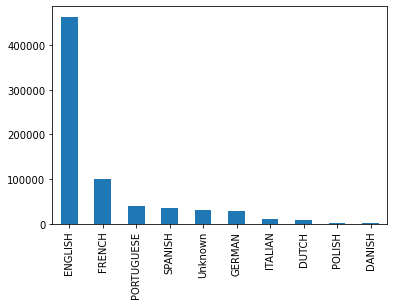

In [121]:
train_reviews_new.language.value_counts().plot(kind='bar')

In [136]:
def translation(df):

    def translate(x):
        text = GoogleTranslator(source='auto', target='en').translate(x)
        return text
    
    df = df[(df['language'] != 'ENGLISH') & (df['language'] != 'Unknown')]
    #df5 = df[(df['language'] != 'Unknown')]

    df['tranlation'] = df['comments_clean'].apply(translate)
    return df
        
    

In [138]:
translation(train_reviews_new.head(50))

/var/folders/dw/f6xwpmns6s321gz1zdbmff6w0000gn/T/ipykernel_42243/2825896494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tranlation'] = df['comments_clean'].apply(translate)


,comments,comments_clean,language,language_reliable,language_raw,tranlation
index,,,,,,
1,Das Hostel war neu und deshalb funktionierte a...,Das Hostel war neu und deshalb funktionierte a...,GERMAN,True,"((GERMAN, de, 99, 779.0), (Unknown, un, 0, 0.0...",The hostel was new and therefore everything wo...
1,Bonne auberge pour les jeunes,Bonne auberge pour les jeunes,FRENCH,True,"((FRENCH, fr, 96, 1501.0), (Unknown, un, 0, 0....",Good hostel for young people
1,"Un lugar muy recomendado, esta muy bien ubicad...",Un lugar muy recomendado esta muy bien ubicado...,SPANISH,True,"((SPANISH, es, 99, 949.0), (Unknown, un, 0, 0....","A highly recommended place, it is very well lo..."
1,Je trouve le logement cher pour une auberge de...,Je trouve le logement cher pour une auberge de...,FRENCH,True,"((FRENCH, fr, 99, 758.0), (Unknown, un, 0, 0.0...",I find the accommodation expensive for a youth...
1,"Bem localizado, estação de metro atravessando ...",Bem localizado estao de metro atravessando a r...,PORTUGUESE,True,"((PORTUGUESE, pt, 99, 720.0), (Unknown, un, 0,...","Well located, metro station across the street ..."
1,Minha estadia foi quando estava comecando o su...,Minha estadia foi quando estava comecando o su...,PORTUGUESE,True,"((PORTUGUESE, pt, 99, 787.0), (Unknown, un, 0,...",My stay was when the Corona outbreak was start...
1,Ambiente acolhedor com uma localização excelen...,Ambiente acolhedor com uma localizao excelente...,PORTUGUESE,True,"((PORTUGUESE, pt, 98, 793.0), (Unknown, un, 0,...",Cozy environment with an excellent location Ve...
1,"Un lugar muy acogedor, buen lugar donde hosped...",Un lugar muy acogedor buen lugar donde hospeda...,SPANISH,True,"((SPANISH, es, 99, 608.0), (Unknown, un, 0, 0....","A very cozy place, a good place to stay, very ..."
1,É um excelente espaço próximo ao Marquês de Po...,um excelente espao prximo ao Marqus de Pombal...,PORTUGUESE,True,"((PORTUGUESE, pt, 99, 604.0), (Unknown, un, 0,...",It is an excellent space close to the Marqus d...
